In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import numpy as np
import seaborn as sns
from functools import reduce
%matplotlib inline

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import Net Immigration Migration (NIM) data
nim_df = pd.read_csv("Resources/Census-NIM-2017-2060_np2017_d4.csv")

# display data
nim_df

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_0,NIM_1,NIM_2,NIM_3,NIM_4,NIM_5,...,NIM_76,NIM_77,NIM_78,NIM_79,NIM_80,NIM_81,NIM_82,NIM_83,NIM_84,NIM_85
0,0,0,2017,996800,20568,16084,14182,12235,10893,10365,...,551,441,342,147,-48,-277,-599,-854,-1159,-11590
1,0,0,2018,1001528,20761,17423,13981,12133,10925,10415,...,564,380,225,68,-140,-328,-672,-983,-1209,-11898
2,0,0,2019,1005801,20951,17579,15132,11969,10832,10436,...,244,348,143,-23,-190,-432,-757,-1031,-1367,-12238
3,0,0,2020,1009861,21140,17735,15248,12950,10689,10354,...,311,44,119,-125,-286,-477,-862,-1152,-1414,-12718
4,0,0,2021,1013839,21322,17882,15364,13041,11499,10244,...,94,98,-176,-149,-399,-604,-911,-1264,-1546,-13167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,9,2,2056,110859,2189,1969,1828,1632,1363,1201,...,-160,-131,-111,-96,-114,-167,-241,-332,-428,-4881
1316,9,2,2057,111134,2199,1979,1838,1640,1370,1208,...,-162,-146,-119,-103,-124,-165,-254,-333,-415,-4913
1317,9,2,2058,111405,2207,1987,1845,1647,1377,1213,...,-166,-146,-131,-109,-129,-175,-251,-350,-416,-4923
1318,9,2,2059,111663,2217,1997,1854,1655,1382,1218,...,-169,-151,-131,-122,-137,-182,-264,-347,-434,-4936


In [3]:
# filter data to show total NIM data for both males and females together. In census NIM dataset, 
# sex == 0 is for both sexes. sex == 1 is for males and sex == 2 is for females. race == 0 is for all races.
nim_df_mf = nim_df.loc[(nim_df['RACE_HISP'] == 0) & (nim_df['SEX'] == 0),:]
nim_df_mf.head()

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_0,NIM_1,NIM_2,NIM_3,NIM_4,NIM_5,...,NIM_76,NIM_77,NIM_78,NIM_79,NIM_80,NIM_81,NIM_82,NIM_83,NIM_84,NIM_85
0,0,0,2017,996800,20568,16084,14182,12235,10893,10365,...,551,441,342,147,-48,-277,-599,-854,-1159,-11590
1,0,0,2018,1001528,20761,17423,13981,12133,10925,10415,...,564,380,225,68,-140,-328,-672,-983,-1209,-11898
2,0,0,2019,1005801,20951,17579,15132,11969,10832,10436,...,244,348,143,-23,-190,-432,-757,-1031,-1367,-12238
3,0,0,2020,1009861,21140,17735,15248,12950,10689,10354,...,311,44,119,-125,-286,-477,-862,-1152,-1414,-12718
4,0,0,2021,1013839,21322,17882,15364,13041,11499,10244,...,94,98,-176,-149,-399,-604,-911,-1264,-1546,-13167


Text(0, 0.5, 'Population')

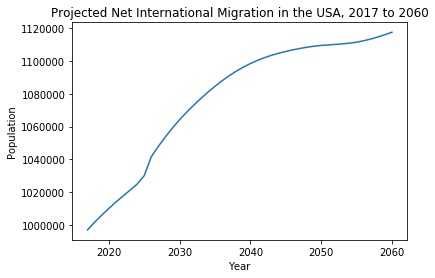

In [4]:
# assign x and y values to prepare to plot graph
year = nim_df_mf['YEAR']
nim = nim_df_mf['TOTAL_NIM']

# plot data using line graph
ax, fig = plt.subplots()
plt.plot(year, nim)
plt.title('Projected Net International Migration in the USA, 2017 to 2060')
plt.xlabel('Year')
plt.ylabel('Population')


The r-squared is: 0.936023542745225


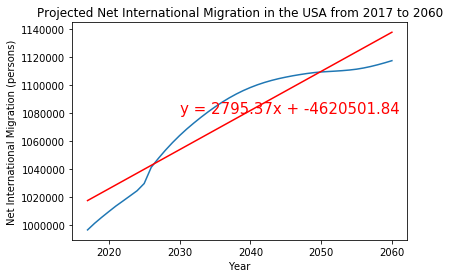

In [5]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, nim)
regress_values = year * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(year, nim)
plt.plot(year,regress_values,"r-")
plt.annotate(line_eq,(2030,1080000),fontsize=15,color="red")
plt.xlabel('Year')
plt.ylabel('Net International Migration (persons)')
plt.title('Projected Net International Migration in the USA from 2017 to 2060')
print(f"The r-squared is: {rvalue}")

# show plot
plt.show()

# Data munging - split data into three main age groups

In [6]:
# create new df that groups together ages by three main age groups: 
# i) under 15 years, 2) 15-44 years, 3) over 44 years by merging columns 

# create new df by age groups and filter to show all races.
nim_df_agegroups = nim_df
nim_df_agegroups = nim_df_agegroups.loc[(nim_df['RACE_HISP']==0),:]


# store columns under new lists by the three age groups
age_under_15 = ['NIM_0', 'NIM_1', 'NIM_2',
       'NIM_3', 'NIM_4', 'NIM_5', 'NIM_6', 'NIM_7', 'NIM_8', 'NIM_9', 'NIM_10',
       'NIM_11', 'NIM_12', 'NIM_13', 'NIM_14']
age_15_44 = ['NIM_15', 'NIM_16', 'NIM_17',
       'NIM_18', 'NIM_19', 'NIM_20', 'NIM_21', 'NIM_22', 'NIM_23', 'NIM_24',
       'NIM_25', 'NIM_26', 'NIM_27', 'NIM_28', 'NIM_29', 'NIM_30', 'NIM_31',
       'NIM_32', 'NIM_33', 'NIM_34', 'NIM_35', 'NIM_36', 'NIM_37', 'NIM_38',
       'NIM_39', 'NIM_40', 'NIM_41', 'NIM_42', 'NIM_43', 'NIM_44']
age_over_44 = ['NIM_45',
       'NIM_46', 'NIM_47', 'NIM_48', 'NIM_49', 'NIM_50', 'NIM_51', 'NIM_52',
       'NIM_53', 'NIM_54', 'NIM_55', 'NIM_56', 'NIM_57', 'NIM_58', 'NIM_59',
       'NIM_60', 'NIM_61', 'NIM_62', 'NIM_63', 'NIM_64', 'NIM_65', 'NIM_66',
       'NIM_67', 'NIM_68', 'NIM_69', 'NIM_70', 'NIM_71', 'NIM_72', 'NIM_73',
       'NIM_74', 'NIM_75', 'NIM_76', 'NIM_77', 'NIM_78', 'NIM_79', 'NIM_80',
       'NIM_81', 'NIM_82', 'NIM_83', 'NIM_84', 'NIM_85']

# sum the age groups and store in new dataframe
nim_df_agegroups['Under 15 years'] = nim_df_agegroups[age_under_15].sum(axis=1)
nim_df_agegroups['15 to 44 years'] = nim_df_agegroups[age_15_44].sum(axis=1)
nim_df_agegroups['Over 44 years'] = nim_df_agegroups[age_over_44].sum(axis=1)
nim_df_agegroups

# remove extraneous columns
nim_df_agegroups = nim_df_agegroups[['RACE_HISP', 'SEX', 'YEAR', 'TOTAL_NIM','Under 15 years',
       '15 to 44 years', 'Over 44 years']]
nim_df_agegroups


,RACE_HISP,SEX,YEAR,TOTAL_NIM,Under 15 years,15 to 44 years,Over 44 years
0,0,0,2017,996800,188862,720794,87144
1,0,0,2018,1001528,191067,727784,82677
2,0,0,2019,1005801,193119,734795,77887
3,0,0,2020,1009861,194887,742013,72961
4,0,0,2021,1013839,196414,749277,68148
...,...,...,...,...,...,...,...
127,0,2,2056,594882,115836,471221,7825
128,0,2,2057,596196,116219,472918,7059
129,0,2,2058,597595,116609,474632,6354
130,0,2,2059,599062,117001,476372,5689


In [7]:
# calculate percentage by age group
nim_df_agegroups['Perc. under 15 years'] = round((nim_df_agegroups['Under 15 years']/nim_df_agegroups['TOTAL_NIM'])*100,2)
nim_df_agegroups['Perc. 15 to 44 years'] = round((nim_df_agegroups['15 to 44 years']/nim_df_agegroups['TOTAL_NIM'])*100,2)
nim_df_agegroups['Perc. over 44 years'] = round((nim_df_agegroups['Over 44 years']/nim_df_agegroups['TOTAL_NIM'])*100,2)
nim_df_agegroups

,RACE_HISP,SEX,YEAR,TOTAL_NIM,Under 15 years,15 to 44 years,Over 44 years,Perc. under 15 years,Perc. 15 to 44 years,Perc. over 44 years
0,0,0,2017,996800,188862,720794,87144,18.95,72.31,8.74
1,0,0,2018,1001528,191067,727784,82677,19.08,72.67,8.26
2,0,0,2019,1005801,193119,734795,77887,19.20,73.06,7.74
3,0,0,2020,1009861,194887,742013,72961,19.30,73.48,7.22
4,0,0,2021,1013839,196414,749277,68148,19.37,73.90,6.72
...,...,...,...,...,...,...,...,...,...,...
127,0,2,2056,594882,115836,471221,7825,19.47,79.21,1.32
128,0,2,2057,596196,116219,472918,7059,19.49,79.32,1.18
129,0,2,2058,597595,116609,474632,6354,19.51,79.42,1.06
130,0,2,2059,599062,117001,476372,5689,19.53,79.52,0.95


(0, 1217651)

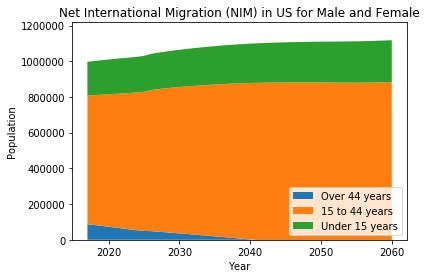

In [8]:
# filter for all sexes 
nim_df_agegroups_mf = nim_df_agegroups.loc[(nim_df_agegroups['SEX']==0),:]

# plot NIM for all sexes using stackplot
x= range(nim_df_agegroups_mf['YEAR'].min(),nim_df_agegroups_mf['YEAR'].max()+1)
y = [nim_df_agegroups_mf['Over 44 years'],nim_df_agegroups_mf['15 to 44 years'],nim_df_agegroups_mf['Under 15 years']]
plt.stackplot(x,y, labels = ['Over 44 years','15 to 44 years','Under 15 years'])
plt.legend(loc='lower right')
plt.title('Net International Migration (NIM) in US for Male and Female')
plt.xlabel('Year')
plt.ylabel('Population')
plt.ylim(0, nim_df_agegroups_mf["TOTAL_NIM"].max()+100000)


In [9]:
# create new df for NIM females only by age group where sex ==2 is females only
nim_df_agegroups_females = nim_df_agegroups.loc[(nim_df_agegroups['SEX']==2),:]
nim_df_agegroups_females

,RACE_HISP,SEX,YEAR,TOTAL_NIM,Under 15 years,15 to 44 years,Over 44 years,Perc. under 15 years,Perc. 15 to 44 years,Perc. over 44 years
88,0,2,2017,507257,91595,357867,57795,18.06,70.55,11.39
89,0,2,2018,509748,92861,361362,55525,18.22,70.89,10.89
90,0,2,2019,512091,93990,364906,53195,18.35,71.26,10.39
91,0,2,2020,514370,94924,368588,50858,18.45,71.66,9.89
92,0,2,2021,516653,95750,372274,48629,18.53,72.05,9.41
93,0,2,2022,518812,96497,376009,46306,18.60,72.48,8.93
94,0,2,2023,520867,97174,379639,44054,18.66,72.89,8.46
95,0,2,2024,522957,97716,383294,41947,18.69,73.29,8.02
96,0,2,2025,525921,98309,387331,40281,18.69,73.65,7.66
97,0,2,2026,532141,99376,392475,40290,18.67,73.75,7.57


(0, 1217651)

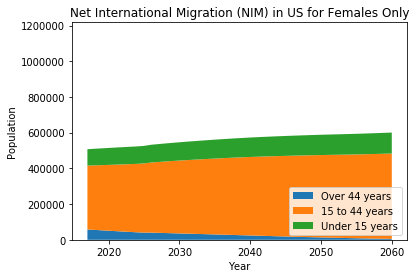

In [10]:
# plot NIM for females only using stackplot
x= range(nim_df_agegroups_females['YEAR'].min(),nim_df_agegroups_females['YEAR'].max()+1)
y = [nim_df_agegroups_females['Over 44 years'],nim_df_agegroups_females['15 to 44 years'],nim_df_agegroups_females['Under 15 years']]
plt.stackplot(x,y, labels = ['Over 44 years','15 to 44 years','Under 15 years'])
plt.legend(loc='lower right')
plt.title('Net International Migration (NIM) in US for Females Only')
plt.xlabel('Year')
plt.ylabel('Population')
plt.ylim(0, nim_df_agegroups_mf["TOTAL_NIM"].max()+100000)


# Calculate Low NIM using actual 2019 NIM of 595,348

In [11]:
# first, create new df for low NIM and filter to show all races 
low_nim_df = nim_df.loc[(nim_df['RACE_HISP'] == 0),:]
low_nim_df

# second, create new column with low NIM projected rates by freezing real-time 
# 2019 NIM rates of 595,348 for all years from 2019 to 2060. NIM rates for 
# before 2019 to be the same as historical rates. 
low_nim_df['NIM_LOW'] = np.where(low_nim_df['YEAR']>2018, 595348, low_nim_df['TOTAL_NIM'])
low_nim_df.head()

# remove unnecessary columns
low_nim_df = low_nim_df[['RACE_HISP', 'SEX', 'YEAR', 'TOTAL_NIM','NIM_LOW']]
low_nim_df

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_LOW
0,0,0,2017,996800,996800
1,0,0,2018,1001528,1001528
2,0,0,2019,1005801,595348
3,0,0,2020,1009861,595348
4,0,0,2021,1013839,595348
...,...,...,...,...,...
127,0,2,2056,594882,595348
128,0,2,2057,596196,595348
129,0,2,2058,597595,595348
130,0,2,2059,599062,595348


Text(0, 0.5, 'Net International Migration (persons)')

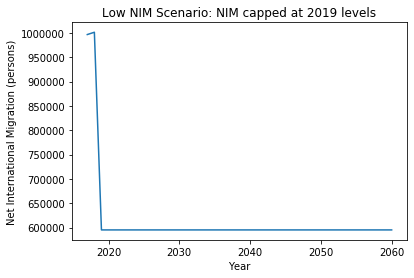

In [12]:
# filter for all sexes and plot low NIM for all sexes
low_nim_df_mf = low_nim_df.loc[(low_nim_df['SEX'] == 0),:]

# define x (year) and y (NIM)
year = low_nim_df_mf['YEAR']
nim_low = low_nim_df_mf['NIM_LOW']

# plot with low NIM
plt.plot(year,nim_low)
plt.title('Low NIM Scenario: NIM capped at 2019 levels')
plt.xlabel('Year')
plt.ylabel('Net International Migration (persons)')


In [13]:
# calculate numbers of low NIM by age group based on percentages calculated 
# from US Census projections (see nim_df_agegroups dataframe)

# first, merge the datafarmes nim_df_agegroups and low_nim_df 
merge_low_nim_df = pd.merge(low_nim_df, nim_df_agegroups, on=['RACE_HISP','SEX','YEAR'], how='inner')
merge_low_nim_df



,RACE_HISP,SEX,YEAR,TOTAL_NIM_x,NIM_LOW,TOTAL_NIM_y,Under 15 years,15 to 44 years,Over 44 years,Perc. under 15 years,Perc. 15 to 44 years,Perc. over 44 years
0,0,0,2017,996800,996800,996800,188862,720794,87144,18.95,72.31,8.74
1,0,0,2018,1001528,1001528,1001528,191067,727784,82677,19.08,72.67,8.26
2,0,0,2019,1005801,595348,1005801,193119,734795,77887,19.20,73.06,7.74
3,0,0,2020,1009861,595348,1009861,194887,742013,72961,19.30,73.48,7.22
4,0,0,2021,1013839,595348,1013839,196414,749277,68148,19.37,73.90,6.72
...,...,...,...,...,...,...,...,...,...,...,...,...
127,0,2,2056,594882,595348,594882,115836,471221,7825,19.47,79.21,1.32
128,0,2,2057,596196,595348,596196,116219,472918,7059,19.49,79.32,1.18
129,0,2,2058,597595,595348,597595,116609,474632,6354,19.51,79.42,1.06
130,0,2,2059,599062,595348,599062,117001,476372,5689,19.53,79.52,0.95


In [14]:
# remove unnecessary columns
merge_low_nim_df = merge_low_nim_df[['RACE_HISP', 'SEX', 'YEAR', 'TOTAL_NIM_x', 'NIM_LOW', 'Perc. under 15 years', 'Perc. 15 to 44 years','Perc. over 44 years']]
merge_low_nim_df = merge_low_nim_df.rename(columns={'TOTAL_NIM_x':'TOTAL_NIM'})
merge_low_nim_df

# then, calculate figures for low NIM by age group
merge_low_nim_df['Under 15 years'] = round((merge_low_nim_df['NIM_LOW']*merge_low_nim_df['Perc. under 15 years'])/100,0)
merge_low_nim_df['15 to 44 years'] = round((merge_low_nim_df['NIM_LOW']*merge_low_nim_df['Perc. 15 to 44 years'])/100,0)
merge_low_nim_df['Over 44 years'] = round((merge_low_nim_df['NIM_LOW']*merge_low_nim_df['Perc. over 44 years'])/100,0)


merge_low_nim_df

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_LOW,Perc. under 15 years,Perc. 15 to 44 years,Perc. over 44 years,Under 15 years,15 to 44 years,Over 44 years
0,0,0,2017,996800,996800,18.95,72.31,8.74,188894.0,720786.0,87120.0
1,0,0,2018,1001528,1001528,19.08,72.67,8.26,191092.0,727810.0,82726.0
2,0,0,2019,1005801,595348,19.20,73.06,7.74,114307.0,434961.0,46080.0
3,0,0,2020,1009861,595348,19.30,73.48,7.22,114902.0,437462.0,42984.0
4,0,0,2021,1013839,595348,19.37,73.90,6.72,115319.0,439962.0,40007.0
...,...,...,...,...,...,...,...,...,...,...,...
127,0,2,2056,594882,595348,19.47,79.21,1.32,115914.0,471575.0,7859.0
128,0,2,2057,596196,595348,19.49,79.32,1.18,116033.0,472230.0,7025.0
129,0,2,2058,597595,595348,19.51,79.42,1.06,116152.0,472825.0,6311.0
130,0,2,2059,599062,595348,19.53,79.52,0.95,116271.0,473421.0,5656.0


In [15]:
# filter for for females only 
merge_low_nim_females = merge_low_nim_df.loc[(merge_low_nim_df['SEX'] == 2),:]
merge_low_nim_females.head()

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_LOW,Perc. under 15 years,Perc. 15 to 44 years,Perc. over 44 years,Under 15 years,15 to 44 years,Over 44 years
88,0,2,2017,507257,507257,18.06,70.55,11.39,91611.0,357870.0,57777.0
89,0,2,2018,509748,509748,18.22,70.89,10.89,92876.0,361360.0,55512.0
90,0,2,2019,512091,595348,18.35,71.26,10.39,109246.0,424245.0,61857.0
91,0,2,2020,514370,595348,18.45,71.66,9.89,109842.0,426626.0,58880.0
92,0,2,2021,516653,595348,18.53,72.05,9.41,110318.0,428948.0,56022.0


# Compare population breakdown (births, deaths, NIM) for 2018 and 2019

In [16]:
# import births and deaths from US Census 2017-2060 dataset
births_df = pd.read_csv("Resources/Census-Births-2017-2060_np2017_d2.csv")
deaths_df = pd.read_csv("Resources/Census-Death-2017-2060_np2017_d3.csv")

# display data
births_df
deaths_df

,RACE_HISP,SEX,YEAR,TOTAL_DEATHS,DTH_0,DTH_1,DTH_2,DTH_3,DTH_4,DTH_5,...,DTH_76,DTH_77,DTH_78,DTH_79,DTH_80,DTH_81,DTH_82,DTH_83,DTH_84,DTH_85
0,0,0,2017,2667093,20497,3265,1074,911,760,629,...,55228,56985,58558,61250,61761,64607,67871,66889,70972,909726
1,0,0,2018,2696006,20403,3286,1057,904,754,627,...,58620,58318,60122,61731,64545,64986,67824,71055,69643,923652
2,0,0,2019,2723837,20302,3261,1073,890,750,624,...,65365,61947,61581,63417,65112,67980,68269,71040,74028,933168
3,0,0,2020,2751811,20188,3232,1071,900,737,617,...,62096,69124,65480,65020,66965,68646,71456,71558,74055,945211
4,0,0,2021,2780803,20057,3204,1065,894,745,607,...,62112,65718,73111,69190,68731,70658,72198,74940,74643,956203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,9,2,2056,1248703,2258,333,148,109,88,72,...,16658,17451,18964,20747,22480,25882,27398,30457,35164,873195
1316,9,2,2057,1235771,2229,327,147,108,86,71,...,16383,18304,19180,20831,23134,24832,27981,29564,32744,864998
1317,9,2,2058,1222447,2200,323,145,107,85,70,...,16363,18013,20132,21081,23250,25577,26858,30204,31795,853930
1318,9,2,2059,1208894,2172,318,144,105,84,69,...,16243,18003,19825,22139,23556,25728,27674,29003,32496,841558


In [17]:
# filter for all races and both sexes for both births and deaths df
births_df_mf = births_df.loc[(births_df['RACE_HIS'] == 0) & (births_df['SEX'] == 0),:]
deaths_df_mf = deaths_df.loc[(deaths_df['RACE_HISP'] == 0) & (deaths_df['SEX'] == 0),:]

# drop unnecessary columns from both dfs
births_df_mf = births_df_mf[['YEAR','BIRTHS']]
deaths_df_mf = deaths_df_mf[['YEAR','TOTAL_DEATHS']]
deaths_df_mf

# merge deaths_df_mf and births_df_mf on race_his, sex and year
births_deaths_df = pd.merge(births_df_mf, deaths_df_mf, on='YEAR', how='inner')
births_deaths_df.head()

,YEAR,BIRTHS,TOTAL_DEATHS
0,2017,4053964,2667093
1,2018,4075205,2696006
2,2019,4094965,2723837
3,2020,4112212,2751811
4,2021,4126260,2780803


In [18]:
# create new df for nim and low nim based on merge_low_nim_df
nim_low_nim = merge_low_nim_df.loc[(merge_low_nim_df['SEX'] == 0),:]
nim_low_nim = nim_low_nim[['YEAR','NIM_LOW']]
nim_low_nim

# merge births_deaths_df with merge_low_nim_df
births_deaths_nim_df = pd.merge(births_deaths_df, nim_low_nim, on='YEAR', how='inner')
births_deaths_nim_df.head()

# rename headers
births_deaths_nim_df = births_deaths_nim_df.rename(columns={"YEAR":'Year',
                                                            "BIRTHS":'Births',
                                                            "TOTAL_DEATHS":'Deaths',
                                                            "NIM_LOW":'NIM*'})
births_deaths_nim_df.head()

,Year,Births,Deaths,NIM*
0,2017,4053964,2667093,996800
1,2018,4075205,2696006,1001528
2,2019,4094965,2723837,595348
3,2020,4112212,2751811,595348
4,2021,4126260,2780803,595348


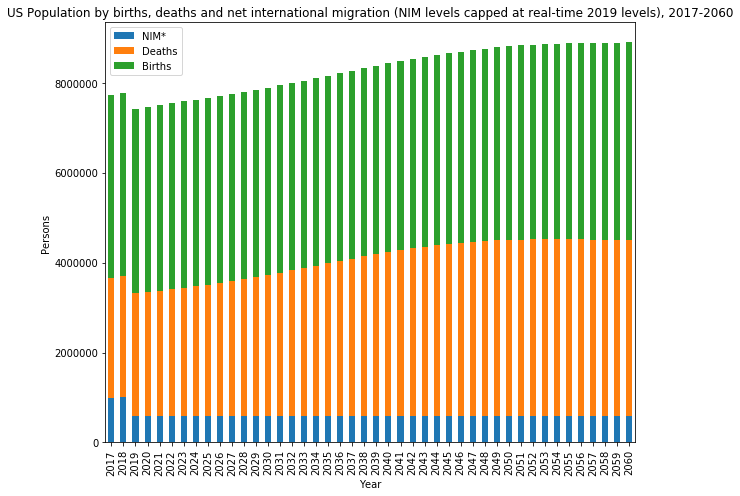

In [19]:
# plot all years using stacked bar chart
births_deaths_nim_df.loc[:,['Year','NIM*','Deaths','Births']].plot.bar(x='Year',stacked=True, figsize = (10,7))
plt.title('US Population by births, deaths and net international migration (NIM levels capped at real-time 2019 levels), 2017-2060')
plt.ylabel('Persons')
plt.tight_layout()

Text(0, 0.5, 'Persons')

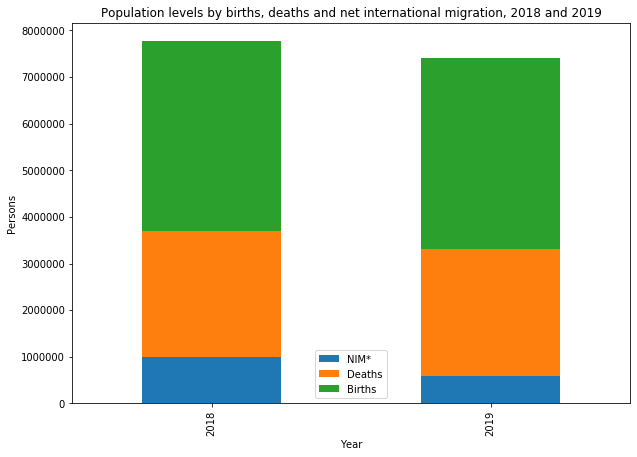

In [20]:
# plot just for 2018 and 2019
births_deaths_nim_df.loc[[1,2],['Year','NIM*','Deaths','Births']].plot.bar(x='Year',stacked=True,figsize = (10,7))
plt.title('Population levels by births, deaths and net international migration, 2018 and 2019')
plt.ylabel('Persons')


# Calculate and graph out what NIM levels need to be to avoid population decline + falling TFR?

In [21]:
# add in TFR DATA FROM THIEN

# import World Bank and UN TFR data 
#wb_tfr_df = pd.read_csv('Resources/API_SP.DYN.TFRT.IN_DS2_en_csv_v2_674456.csv', delimiter=',')
#un_tfr_df = pd.read_csv("Resources/WPP2019_Period_Indicators_Medium.csv",delimiter=",")
# display data
#wb_tfr_df.head()


In [22]:
# import Total Population US Census 2017-2060 data
pop_df = pd.read_csv("Resources/Census-Population-By-Age-2016-2060_np2017_d1.csv")

# display data
pop_df.head()

,SEX,ORIGIN,RACE,YEAR,TOTAL_POP,POP_0,POP_1,POP_2,POP_3,POP_4,...,POP_91,POP_92,POP_93,POP_94,POP_95,POP_96,POP_97,POP_98,POP_99,POP_100
0,0,0,0,2016,323127513,3970145,3995008,3992154,3982074,3987656,...,449986,372625,300000,239313,186408,135797,94311,68972,44895,81896
1,0,0,0,2017,325511184,4054035,3982964,4008116,4003478,3992207,...,449945,382669,311525,246219,192531,146801,104540,70840,50486,83574
2,0,0,0,2018,327891911,4075563,4068172,3995888,4019345,4013649,...,462335,382993,320285,256011,198354,151848,113165,78659,51938,86221
3,0,0,0,2019,330268840,4095614,4089881,4082231,4006967,4029427,...,467488,393919,320884,263533,206526,156654,117240,85265,57778,87671
4,0,0,0,2020,332639102,4113164,4110117,4104058,4094281,4016919,...,464985,398712,330389,264318,212880,163348,121128,88491,62724,92064


# filter data to show total pop data for both males and females together. In census total pop dataset:
# sex == 0 is for both sexes. sex == 1 is for males and sex == 2 is for females. race == 0 is for all races;
# origin == 0 is for both hispanic and non-hispanic;
# race == 0 is for all races.
pop_df = pop_df.loc[(pop_df['SEX'] == 0) & (pop_df['ORIGIN'] == 0) & (pop_df['RACE'] == 0),:]
pop_df.head()

# remove extraneous files
pop_df = pop_df[['YEAR','TOTAL_POP']]


# create new df that groups together ages by three main age groups for total pop: 
# i) under 15 years, 2) 15-44 years, 3) over 44 years by merging columns 

# create new df by age groups and filter to show all races and both sexes only.
pop_df_agegroups = pop_df
pop_df_agegroups = pop_df_agegroups.loc[(pop_df['SEX']==0) & (pop_df['ORIGIN']==0) & (pop_df['RACE']==0),:]


# store columns under new lists by the three age groups
age_under_15 = pop_df_agegroups.iloc[:,5:20].columns
age_15_44 = pop_df_agegroups.iloc[:,20:50].columns
age_over_44 = pop_df_agegroups.iloc[:,50:106].columns

# sum the age groups and store in new dataframe
pop_df_agegroups['Under 15 years'] = pop_df_agegroups[age_under_15].sum(axis=1)
pop_df_agegroups['15 to 44 years'] = pop_df_agegroups[age_15_44].sum(axis=1)
pop_df_agegroups['Over 44 years'] = pop_df_agegroups[age_over_44].sum(axis=1)
pop_df_agegroups

# remove extraneous columns
pop_df_agegroups = pop_df_agegroups[['SEX','YEAR','TOTAL_POP','Under 15 years',
       '15 to 44 years', 'Over 44 years']]
pop_df_agegroups

# calculate percentage by age group
pop_df_agegroups['Perc. under 15 years'] = round((pop_df_agegroups['Under 15 years']/pop_df_agegroups['TOTAL_POP'])*100,2)
pop_df_agegroups['Perc. 15 to 44 years'] = round((pop_df_agegroups['15 to 44 years']/pop_df_agegroups['TOTAL_POP'])*100,2)
pop_df_agegroups['Perc. over 44 years'] = round((pop_df_agegroups['Over 44 years']/pop_df_agegroups['TOTAL_POP'])*100,2)
pop_df_agegroups

# filter for females only
pop_df_agegroups_fem = pop_df_agegroups.loc[(pop_df['SEX']==2),:]


## calculate number of females 15-44 projected out
total_pop = pop_df_agegroups_fem['15 to 44 years'].tolist()
growth_initial = total_pop[1] - total_pop[0]

growth_rate = []
avg_growth_rate = 0

pop_df_agegroups_fem.head()
pop_df_agegroups.to_csv("female15_44_census.csv")

##
print(growth_initial)
for x in range(0,len(total_pop)):
    if x == 0:
        growth_rate.append(growth_initial)
    else:
        growth_rate.append(total_pop[x] - total_pop[x-1])
    avg_growth_rate = int((growth_rate[x] + growth_rate[x-1])/2)


growth_rate_change = []
avg_growth_rate_change = 0

#print(growth_rate)
growth_rate_change_initial = growth_rate[0] 
#print(growth_rate_change_initial)

for x in range(0,len(growth_rate)):
    if x == 0:
        growth_rate_change.append(growth_rate_change_initial)
    else:
        growth_rate_change.append(growth_rate[x] - growth_rate[x-1])
        avg_growth_rate_change = int((growth_rate_change[x-1] + growth_rate_change[x])/2)

#print(avg_growth_rate)
print(growth_rate_change)

proj_pop = total_pop.copy()
proj_year = pop_df_agegroups_fem['YEAR'].tolist()

#print(proj_year)
#print(proj_pop)

new_growth_rate = avg_growth_rate
print(new_growth_rate)
#while new_growth_rate > -100000:
 #   proj_year.append(proj_year[-1] + 1)
  #  proj_pop.append(proj_pop[-1] + new_growth_rate)
   # new_growth_rate += avg_growth_rate_change   
    #print(new_growth_rate)


# plot
#year = pop_df_agegroups_fem['YEAR']
year = np.arange(len(growth_rate_change))
#proj_pop

ax, fig = plt.subplots()
#plt.plot(proj_year, proj_pop)
plt.title('US Projected Population Females')
plt.xlabel('Years')
plt.ylabel('Population')
current_nim = fig.plot(year, growth_rate_change, color = "blue", label = "Pre-2019 NIM")
#low_nim = fig.plot(nim_proj_year, nim_proj_pop, color = "red", linestyle='dashed', label = "2019 NIM")
plt.legend(loc="lower right")
plt.show()

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, proj_pop)
regress_values = year * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(year, growth_rate_change)
plt.plot(year,regress_values,"r-")
plt.annotate(line_eq,(2030,69000000),fontsize=15,color="red")
#plt.xlabel('Year')
#plt.ylabel('Net International Migration (persons)')
#plt.title('Projected Net International Migration in the USA from 2017 to 2060')
print(f"The r-squared is: {rvalue}")

# show plot
plt.show()

# Extend the data another 50 years
for x in range(50):
    proj_year.append(proj_year[-1] + 1)
    proj_pop.append(proj_pop[-1] + new_growth_rate)
    new_growth_rate += avg_growth_rate_change 
print(proj_pop)
print(proj_year)

# plot data using line graph
ax, fig = plt.subplots()
#plt.plot(proj_year, proj_pop)
plt.title('US Projected Population')
plt.xlabel('Years')
plt.ylabel('Population')
current_nim = fig.plot(proj_year, proj_pop, color = "blue", label = "Pre-2019 NIM")
#low_nim = fig.plot(nim_proj_year, nim_proj_pop, color = "red", linestyle='dashed', label = "2019 NIM")
plt.legend(loc="lower right")
plt.show()

199
199
The peak population is projected at: 467141443
The population is projected to peak at year: 2164


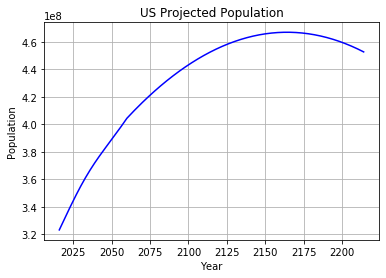

In [23]:
# create lists for nim_proj_year which is the projected population using low NIM 2019 levels
nim_proj_year = [323127513, 325511184, 327891911, 330268840, 332639102, 334998398, 337341954, 339665118, 341963408, 344234377, 346481182, 348695115, 350872007, 353008224, 355100730, 357147329, 359146709, 361098559, 363003410, 364862145, 366676312, 368447857, 370178704, 371871238, 373527973, 375151805, 376746115, 378314343, 379860859, 381390297, 382907447, 384415207, 385917628, 387418788, 388922201, 390430803, 391947055, 393472783, 395009307, 396557404, 398117875, 399690963, 401276590, 402874337, 404483055, 405680107, 406865614, 408039576, 409201993, 410352865, 411492192, 412619974, 413736211, 414840903, 415934050, 417015652, 418085709, 419144221, 420191188, 421226610, 422250487, 423262819, 424263606, 425252848, 426230545, 427196697, 428151304, 429094366, 430025883, 430945855, 431854282, 432751164, 433636501, 434510293, 435372540, 436223242, 437062399, 437890011, 438706078, 439510600, 440303577, 441085009, 441854896, 442613238, 443360035, 444095287, 444818994, 445531156, 446231773, 446920845, 447598372, 448264354, 448918791, 449561683, 450193030, 450812832, 451421089, 452017801, 452602968, 453176590, 453738667, 454289199, 454828186, 455355628, 455871525, 456375877, 456868684, 457349946, 457819663, 458277835, 458724462, 459159544, 459583081, 459995073, 460395520, 460784422, 461161779, 461527591, 461881858, 462224580, 462555757, 462875389, 463183476, 463480018, 463765015, 464038467, 464300374, 464550736, 464789553, 465016825, 465232552, 465436734, 465629371, 465810463, 465980010, 466138012, 466284469, 466419381, 466542748, 466654570, 466754847, 466843579, 466920766, 466986408, 467040505, 467083057, 467114064, 467133526, 467141443, 467137815, 467122642, 467095924, 467057661, 467007853, 466946500, 466873602, 466789159, 466693171, 466585638, 466466560, 466335937, 466193769, 466040056, 465874798, 465697995, 465509647, 465309754, 465098316, 464875333, 464640805, 464394732, 464137114, 463867951, 463587243, 463294990, 462991192, 462675849, 462348961, 462010528, 461660550, 461299027, 460925959, 460541346, 460145188, 459737485, 459318237, 458887444, 458445106, 457991223, 457525795, 457048822, 456560304, 456060241, 455548633, 455025480, 454490782, 453944539, 453386751, 452817418]
year_proj = range(2016,2215)
print(len(nim_proj_year))
print(len(year_proj))
# create df
ideal_df = pd.DataFrame({"Year":year_proj,"Total Population": nim_proj_year})
tot_pop_ideal = ideal_df['Total Population']
year_ideal = ideal_df['Year']
#print(ideal_df)

# define inflection point
for x in np.arange(len(nim_proj_year)):
        if (tot_pop_ideal[x+1]<tot_pop_ideal[x]):
            print(f'The peak population is projected at: {tot_pop_ideal[x]}')
            print(f'The population is projected to peak at year: {year_ideal[x]}')
            inflection_pop=tot_pop_ideal[x]
            inflection_year = year_ideal[x]
            break

#print(inflection_year)
#print(inflection_pop)

# plot projected population with 2019 nim levels (phil)
ax, fig = plt.subplots()
plt.title('US Projected Population')
plt.xlabel('Year')
plt.ylabel('Population')
current_nim = fig.plot(year_proj, nim_proj_year, color = "blue", label = "Pre-2019 NIM")
plt.grid()



In [24]:
# adjust ideal_df and include another column with ideal_tot_pop to flatten out population figures
# to avoid population decline

ideal_df_adjusted = ideal_df
ideal_df_adjusted['Adjusted Total Population'] = ideal_df['Total Population'].copy()
ideal_df_adjusted['Adjusted Total Population'].loc[ideal_df_adjusted['Year']>inflection_year]=inflection_pop
ideal_df_adjusted

#print(len(ideal_df_adjusted['Adjusted Total Population']))



,Year,Total Population,Adjusted Total Population
0,2016,323127513,323127513
1,2017,325511184,325511184
2,2018,327891911,327891911
3,2019,330268840,330268840
4,2020,332639102,332639102
...,...,...,...
194,2210,455025480,467141443
195,2211,454490782,467141443
196,2212,453944539,467141443
197,2213,453386751,467141443


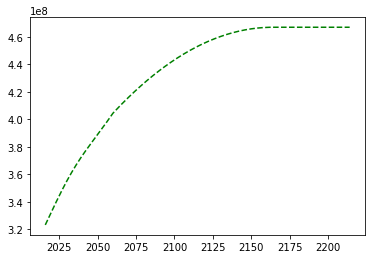

In [25]:
# plot adjusted projected population
ax, fig = plt.subplots()
adjusted_pop_plot = fig.plot(ideal_df_adjusted['Year'], ideal_df_adjusted['Adjusted Total Population'], color = "green", linestyle='dashed', label = "Adjusted Population")


In [26]:
# add in worldbank % of total fem to ideal_df and calculate # female total in new column in ideal_df
ideal_df 

# import world bank thien projected total female figures
wb_fem_tot_df = pd.read_csv('Resources/fem_tot_perc_proj.csv') 
wb_fem_tot_df.head()

# merge ideal_df and wb_fem_tot_df on year column
ideal_wb_df = pd.merge(ideal_df, wb_fem_tot_df, on='Year',how='outer')
ideal_wb_df

# remove extraneous rows to just keep data between the years 2016 - 2164
ideal_wb_df = ideal_wb_df.loc[(ideal_wb_df['Year']> 2015)]
#ideal_wb_df.count()
ideal_wb_df = ideal_wb_df.rename(columns={"United States": "Perc. Total Females"}) 
ideal_wb_df

# calculate total number of females based on Perc. Total Females and store in new column
ideal_wb_df['Number Total Females'] = round((ideal_wb_df['Adjusted Total Population'])*(ideal_wb_df['Perc. Total Females']/100))
ideal_wb_df

# plot
#plt.plot(ideal_wb_df['Year'],ideal_wb_df['Total Females'])

,Year,Total Population,Adjusted Total Population,Perc. Total Females,Number Total Females
0,2016,323127513.0,323127513.0,50.529313,163274112.0
1,2017,325511184.0,325511184.0,50.523382,164459260.0
2,2018,327891911.0,327891911.0,50.520015,165651041.0
3,2019,330268840.0,330268840.0,50.708293,167473691.0
4,2020,332639102.0,332639102.0,50.706940,168671110.0
...,...,...,...,...,...
194,2210,455025480.0,467141443.0,NaN,NaN
195,2211,454490782.0,467141443.0,NaN,NaN
196,2212,453944539.0,467141443.0,NaN,NaN
197,2213,453386751.0,467141443.0,NaN,NaN


In [27]:
# add in worldbank % of fem 15-44 years to ideal_df and calculate # fem 15_44 in new column in ideal_df 
# by doing calculation off of number of females

# import world bank thien projected fem 15-44 figures
wb_fem_15_44_df = pd.read_csv('Resources/perc_women_proj.csv')
wb_fem_15_44_df.head()

# merge ideal_df and wb_fem_15_44_df on year column
ideal_wb_df = pd.merge(ideal_wb_df, wb_fem_15_44_df, on='Year',how='outer')
ideal_wb_df

# remove extraneous rows to just keep data between the years 2016 - 2164
ideal_wb_df = ideal_wb_df.loc[(ideal_wb_df['Year']> 2015) & (ideal_wb_df['Year']<2165)]
ideal_wb_df
ideal_wb_df = ideal_wb_df.rename(columns={"Female (15 - 44)": "Perc. Female 15-44"})
ideal_wb_df

# plot
#plt.plot(ideal_wb_df['Year'],ideal_wb_df['Female (15 - 44)'])

# calculate number of fem 15-44 based on tot_fem in new column
ideal_wb_df['Number Female 15-44'] = round((ideal_wb_df['Number Total Females'])*(ideal_wb_df['Perc. Female 15-44']/100))
ideal_wb_df
#plt.plot(ideal_wb_df['Year'],ideal_wb_df['Number Female 15-44'])

,Year,Total Population,Adjusted Total Population,Perc. Total Females,Number Total Females,Perc. Female 15-44,Number Female 15-44
0,2016,323127513.0,323127513.0,50.529313,163274112.0,39.200929,64004968.0
1,2017,325511184.0,325511184.0,50.523382,164459260.0,39.158784,64400247.0
2,2018,327891911.0,327891911.0,50.520015,165651041.0,39.115815,64795755.0
3,2019,330268840.0,330268840.0,50.708293,167473691.0,41.846705,70082221.0
4,2020,332639102.0,332639102.0,50.706940,168671110.0,41.835740,70564807.0
...,...,...,...,...,...,...,...
144,2160,467040505.0,467040505.0,50.517520,235937281.0,40.300607,95084155.0
145,2161,467083057.0,467083057.0,50.516167,235952457.0,40.289641,95064399.0
146,2162,467114064.0,467114064.0,50.514814,235961801.0,40.278676,95042290.0
147,2163,467133526.0,467133526.0,50.513461,235965311.0,40.267711,95017829.0


In [28]:
# read in tfr projected file and merge with ideal_wb_df
tfr_proj_df = pd.read_csv('Resources/tfr_projections.csv')
tfr_proj_df.tail()

# remove extraneous years to just keep rows from 2016 to 2164
tfr_proj_df = tfr_proj_df.loc[(tfr_proj_df['Year']>2015) & (tfr_proj_df['Year']<2165)]
tfr_proj_df

# merge with ideal_wb_df on year
ideal_wb_df = pd.merge(ideal_wb_df, tfr_proj_df, on='Year',how='outer')
ideal_wb_df



,Year,Total Population,Adjusted Total Population,Perc. Total Females,Number Total Females,Perc. Female 15-44,Number Female 15-44,TFR
0,2016,323127513.0,323127513.0,50.529313,163274112.0,39.200929,64004968.0,1.8205
1,2017,325511184.0,325511184.0,50.523382,164459260.0,39.158784,64400247.0,1.7655
2,2018,327891911.0,327891911.0,50.520015,165651041.0,39.115815,64795755.0,1.7760
3,2019,330268840.0,330268840.0,50.708293,167473691.0,41.846705,70082221.0,NaN
4,2020,332639102.0,332639102.0,50.706940,168671110.0,41.835740,70564807.0,NaN
...,...,...,...,...,...,...,...,...
144,2160,467040505.0,467040505.0,50.517520,235937281.0,40.300607,95084155.0,1.8210
145,2161,467083057.0,467083057.0,50.516167,235952457.0,40.289641,95064399.0,1.8210
146,2162,467114064.0,467114064.0,50.514814,235961801.0,40.278676,95042290.0,1.8210
147,2163,467133526.0,467133526.0,50.513461,235965311.0,40.267711,95017829.0,1.8210


In [30]:
# calculate live births for each year by TFR * Number of Females 15-44
ideal_wb_df['Number Live Births'] = round(ideal_wb_df['TFR']*ideal_wb_df['Number Female 15-44'])
ideal_wb_df

,Year,Total Population,Adjusted Total Population,Perc. Total Females,Number Total Females,Perc. Female 15-44,Number Female 15-44,TFR,Number Live Births
0,2016,323127513.0,323127513.0,50.529313,163274112.0,39.200929,64004968.0,1.8205,116521044.0
1,2017,325511184.0,325511184.0,50.523382,164459260.0,39.158784,64400247.0,1.7655,113698636.0
2,2018,327891911.0,327891911.0,50.520015,165651041.0,39.115815,64795755.0,1.7760,115077261.0
3,2019,330268840.0,330268840.0,50.708293,167473691.0,41.846705,70082221.0,NaN,NaN
4,2020,332639102.0,332639102.0,50.706940,168671110.0,41.835740,70564807.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
144,2160,467040505.0,467040505.0,50.517520,235937281.0,40.300607,95084155.0,1.8210,173148246.0
145,2161,467083057.0,467083057.0,50.516167,235952457.0,40.289641,95064399.0,1.8210,173112271.0
146,2162,467114064.0,467114064.0,50.514814,235961801.0,40.278676,95042290.0,1.8210,173072010.0
147,2163,467133526.0,467133526.0,50.513461,235965311.0,40.267711,95017829.0,1.8210,173027467.0


In [59]:
# create new column to calculate number difference of births between years
num_live_births = ideal_wb_df['Number Live Births']
ideal_wb_df['Change in births'] = ideal_wb_df['Number Live Births'].diff()
ideal_wb_df


,Year,Total Population,Adjusted Total Population,Perc. Total Females,Number Total Females,Perc. Female 15-44,Number Female 15-44,TFR,Number Live Births,Change in births
0,2016,323127513.0,323127513.0,50.529313,163274112.0,39.200929,64004968.0,1.8205,116521044.0,NaN
1,2017,325511184.0,325511184.0,50.523382,164459260.0,39.158784,64400247.0,1.7655,113698636.0,-2822408.0
2,2018,327891911.0,327891911.0,50.520015,165651041.0,39.115815,64795755.0,1.7760,115077261.0,1378625.0
3,2019,330268840.0,330268840.0,50.708293,167473691.0,41.846705,70082221.0,NaN,NaN,NaN
4,2020,332639102.0,332639102.0,50.706940,168671110.0,41.835740,70564807.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
144,2160,467040505.0,467040505.0,50.517520,235937281.0,40.300607,95084155.0,1.8210,173148246.0,-31689.0
145,2161,467083057.0,467083057.0,50.516167,235952457.0,40.289641,95064399.0,1.8210,173112271.0,-35975.0
146,2162,467114064.0,467114064.0,50.514814,235961801.0,40.278676,95042290.0,1.8210,173072010.0,-40261.0
147,2163,467133526.0,467133526.0,50.513461,235965311.0,40.267711,95017829.0,1.8210,173027467.0,-44543.0


In [61]:
# calculate average of differences in change in births
avg_change_births = ideal_wb_df['Change in births'].mean()
avg_change_births

68879.67647058824

In [ ]:
# store value of number of females 15-44 at 2164 to a variable
#num_fem_15_44 = ideal_wb_df['Number Female 15-44'].loc[ideal_wb_df['Year']==2164] #FIX THIS
num_fem_15_44 = 94991021 

#num_fem_15_44
print(f'The number of females 15-44 years projected in 2164 is: {num_fem_15_44}')


# calculate number of live births at TFR of 2.1 at 2164 based on number of fem 15-44 calculated above
# no. live births = (2.1 * Fem 15-44 years)
replacement_rate = 2.1
num_live_births_2164 = round((replacement_rate * num_fem_15_44)) # FIX THIS TO REMOVE DECIMAL
num_live_births_2164
print(f'The number of live births needed for a TFR 2.1 in 2164 is: {num_live_births_2164}')


In [ ]:
# calculate number of live births at projected TFR of XX at 2164 based on number of fem 15-44 calculated above
# no. live births = (TFR_2164 * Fem 15-44 years)
TFR_2164 = 1.821 # ADD TFR HERE FROM THIEN 
num_live_births_2164_2 = round((TFR_2164 * num_fem_15_44)) # FIX THIS TO REMOVE DECIMAL
num_live_births_2164_2
print(f'The number of live births needed at projected TFR in 2164 at peak population is: {num_live_births_2164_2}')

# PHIL ADD CODE BELOW

In [ ]:
# add deaths 
# total deaths from 2018 divided by total population in 2018 and to be used as a constant
death_rate = 0.00859875 

# calculate number of deaths projected at 2164
num_deaths = round(inflection_pop * death_rate) # add code to explain this
num_deaths

In [ ]:
# projecet NIM at 2019 levels (595,348) until 2164 and extend dataframe years to 2215
low_nim_df_mf_proj = low_nim_df_mf[['YEAR','NIM_LOW']]
proj_years_add = {'YEAR':range(2061,2216)}
low_nim_df_mf_proj = low_nim_df_mf_proj.append(pd.DataFrame(proj_years_add))
low_nim_df_mf_proj['NIM_LOW'].fillna(595348,inplace=True)
low_nim_df_mf_proj=low_nim_df_mf_proj[['YEAR','NIM_LOW']]
low_nim_df_mf_proj


In [ ]:
# calculate what NIM should be at 2164 based on population, births and deaths projected at 2164
#   population at 2163 = 467133526
#   population at 2164 = inflection_pop or 467,141,443
#   births at 2164 = num_live_births_2164 or 394,917
#   deaths at 2164 = num_deaths or 4,016,832
#   NIM = population - births + deaths

# create population at 2163 variable
pop_2163 = 467133526

# scenario 1 at TFR of 2.1
num_nim_2164 = inflection_pop - num_live_births_2164 + num_deaths
print(num_nim_2164)

# scenario 2 at projected TFR at 2164
num_nim_2164_2 = 7917 - num_live_births_2164_2 + num_deaths
num_nim_2164_2

# add ideal NIM starting at 2164 to 2215 to low_nim_df_mf_proj 
low_nim_df_mf_proj['NIM_LOW'].loc[low_nim_df_mf_proj['YEAR']>2163]=num_nim_2164_2 ## change to num_nim_2164_2 for scenario 2
low_nim_df_mf_proj
# plot NIM - second NIM plot with adjusted figures from 2164 onwards




In [ ]:
# define x (year) and y (NIM)
year_low_nim_proj = low_nim_df_mf_proj['YEAR']
nim_low_proj = low_nim_df_mf_proj['NIM_LOW']
#print(len(year_low_nim_proj))
#print(len(nim_low_proj))

In [ ]:
# plot everything on one graph
ax, fig = plt.subplots()
plt.title('US Projected Population Adjusted')
plt.xlabel('Year')
plt.ylabel('Population')
current_nim = fig.plot(year_proj, nim_proj_year, color = "blue", label = "Population Projected with Pre-2019 NIM levels")
adjusted_pop_plot = fig.plot(ideal_df_adjusted['Year'], ideal_df_adjusted['Adjusted Total Population'], color = "green", linestyle='dashed', label = "Adjusted Population")
low_nim = fig.plot(year_low_nim_proj, nim_low_proj, color = 'red') 
# add tfr projected on separate y axis

# add vertical line at 2164
plt.axvline(x=2164, color = 'red', linestyle='dashed')
plt.grid()




In [ ]:
## EVENLY DISTRIBUTE NIM FROM 2020 TO 2164 TO REACH IDEAL NIM LEVELS AND GRAPH OUT

# 
# num_years_distribute_nim = 2164 - 2020
# num_nim_todistribute_peryear = num_nim_2164_2 / num_years_distribute_nim


In [ ]:
# create new column to store new gradual NIM levels to be added from 2020-2064 in new dataframe based off low_nim_df_mf_proj dataframe
#low_nim_df_mj_proj_gradual = low_nim_df_mf_proj

# add new column called new_gradual_NIM and copy values of low_nim there first
low_nim_df_mj_proj_gradual['New Gradual NIM'] = low_nim_df_mf_proj['NIM_LOW'].copy()

# then select in New Gradual Nim column just the rows from 2020 to 2163 and add num_nim_todistribute_peryear figure


# display df
low_nim_df_mj_proj_gradual

# plot it

In [ ]:
# plot the other lines from the first version of graph 8 above
